In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

Select one of the following datasets:
- Hotel reservations (kaggle) - I selected this dataset
- Home loans (kaggle)
- Airlines delay (kaggle)
- Job placement (kaggle)
- Superstore marketing (kaggle)

1. Identify the types of attributes:  quantitative (continuous or discrete values), qualitative (ordinal or nominal)

In [22]:
hotel_reservations = pd.read_csv('./datasets/homework1-2/hotel_reservations.csv')

column_types = hotel_reservations.dtypes
quantitative_attributes = []
qualitative_attributes = []


for column_name, dtype in column_types.items():
    if pd.api.types.is_numeric_dtype(dtype):
        print(f'{column_name}: quantitative')
        quantitative_attributes.append(column_name)
    else:
        print(f'{column_name}: qualitative')
        qualitative_attributes.append(column_name)

Booking_ID: qualitative
no_of_adults: quantitative
no_of_children: quantitative
no_of_weekend_nights: quantitative
no_of_week_nights: quantitative
type_of_meal_plan: qualitative
required_car_parking_space: quantitative
room_type_reserved: qualitative
lead_time: quantitative
arrival_year: quantitative
arrival_month: quantitative
arrival_date: quantitative
market_segment_type: qualitative
repeated_guest: quantitative
no_of_previous_cancellations: quantitative
no_of_previous_bookings_not_canceled: quantitative
avg_price_per_room: quantitative
no_of_special_requests: quantitative
booking_status: qualitative


2. Select a quantitative attribute and apply (independently) the following transformations:

    a. Scaling (all values will be in [0,1])

    b. Standardization (after the transformation the attribute will have value 0 and standard deviation 1)
    
    c. Discretization (using 5 bins)

/home/mihai/.local/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Text(0.5, 1.0, 'uniform')

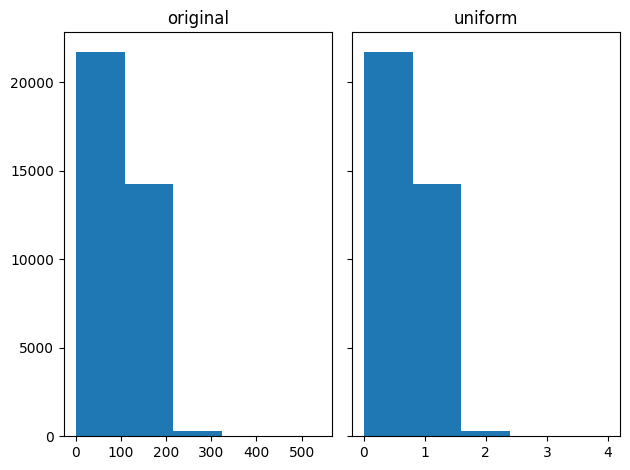

In [21]:
price = np.array(hotel_reservations.avg_price_per_room)

# a.
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(price.reshape(-1, 1))

# b.
standardizer = StandardScaler()
standardized_price = standardizer.fit_transform(price.reshape(-1, 1))

# c.
discretizer = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
discretized_price = discretizer.fit_transform(price.reshape(-1,1))

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(price, bins=5)
axs[0].set_title('original')
axs[1].hist(discretized_price, bins=5)
axs[1].set_title('uniform')

3. Identify an attribute with missing values (if there is none, remove at most 5% of the values of one attribute to create one) and apply an imputation technique

IndexError: index 0 is out of bounds for axis 0 with size 0